In [1]:
import os

for root, dirs, files in os.walk("C:\\Users\\Peiran\\OneDrive - National University of Singapore\\Y3S2 (Exchange)\\CS4486\\HW_3\\Topic_5_Data\\ISIC84by84\\Train\\"):
    print("{} items in {}".format(len(files), os.path.basename(root)))



0 items in 
735 items in AK
3223 items in BCC
2524 items in BKL
139 items in DF
4422 items in MEL
12775 items in NV
528 items in SCC
153 items in VASC


In [17]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 59s 0us/step


In [1]:
import numpy as np
from keras.utils import to_categorical
import matplotlib.pyplot as plt
#%matplotlib inline
from PIL import Image
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
dir="C:\\Users\\Peiran\\OneDrive - National University of Singapore\\Y3S2 (Exchange)\\CS4486\\HW_3\\Topic_5_Data\\ISIC84by84"
int_char = {}
char_int = {}
target_dir = os.fsencode(dir + "\\Train")
count = 0
for f in os.listdir(target_dir):
    cat = os.fsdecode(f)
    int_char[count]= cat
    char_int[cat]=count
    count+=1

datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest'
)

def loadData(directory):
    x = []
    y = []
    for subdir, dirs, files in os.walk(directory):
        if (subdir != directory):
            currX = []
            currY = []
            for file in files:
                file_path = os.path.join(subdir, file)
                if file.endswith(('.png', '.jpg', '.jpeg')):
                    image = Image.open(file_path)
                    pixels = np.array(image)
                    currX.append(pixels)
                    category = os.path.basename(subdir) 
                    currY.append(char_int[category])
            # print(f'x Before: {len(currX)}')
            # print(f'y Before:{len(currY)} ')
            images = np.array(currX)
            labels = np.array(currY)
            if (len(images) < 4000):
                datagen.fit(images)
                count=4000-len(images)
                for X_batch, y_batch in datagen.flow(images,labels, batch_size=1):
                    currX.append(X_batch[0])
                    currY.append(y_batch[0])
                    count -=1
                    if count ==0:
                        break
            else:
                currX = images
                currY = labels
            '''
            if (4000 <= len(images)<=6000):
                datagen.fit(images)
                count=6000-len(currX)
                for X_batch, y_batch in datagen.flow(images,labels, batch_size=1):
                    currX.append(X_batch[0])
                    currY.append(y_batch[0])
                    count -=1
                    if count ==0:
                        break
            '''       
            #if (len(images)>=4000):  
              
                #indices = np.random.choice(len(currX), size=4000, replace=False)
                #currX = images[indices]
                #currY = labels[indices]
                #print(f'x After: {len(currX)}')
                #print(f'y After:{len(currY)} ')
            x.extend(currX)
            y.extend(currY)      
            print(f'x After: {len(currX)}')
            print(f'y After:{len(currY)} ')
    return x, y

trainX, trainY = loadData(dir + "\\Train")
#print(list(set(trainY)))
testX, testY = loadData(dir+ "\\Test")
trainX = np.array(trainX)
testX = np.array(testX)
trainY = np.array(trainY)
# print(trainY)
testY = np.array(testY)
trainX = trainX.astype('float32')
testX = testX.astype('float32')
trainX = trainX / 255.
testX = testX / 255.
indices = np.arange(len(trainX))
np.random.shuffle(indices)
trainX = trainX[indices]
trainY = trainY[indices]
#print(list(set(trainY)))
trainY_one_hot = to_categorical(trainY)
testY_one_hot = to_categorical(testY)


x After: 4000
y After:4000 
x After: 4000
y After:4000 
x After: 4000
y After:4000 
x After: 4000
y After:4000 
x After: 4422
y After:4422 
x After: 12775
y After:12775 
x After: 4000
y After:4000 
x After: 4000
y After:4000 
x After: 4000
y After:4000 
x After: 4000
y After:4000 
x After: 4000
y After:4000 
x After: 4000
y After:4000 
x After: 4000
y After:4000 
x After: 4000
y After:4000 
x After: 4000
y After:4000 
x After: 4000
y After:4000 


In [2]:
from sklearn.model_selection import train_test_split
trainX,validX,trainLabel,validLabel = train_test_split(trainX, trainY_one_hot, test_size=0.2, random_state=13)

import keras
from keras.models import Sequential, Model
from keras.layers import Input
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import BatchNormalization
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.models import load_model
from keras.layers import InputLayer

batch_size = 64
epochs = 40
num_classes = 8

model = Sequential()
model.add(InputLayer(shape=(84, 84, 3)))
model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',padding='same'))
model.add(BatchNormalization())
model.add(LeakyReLU(negative_slope=0.1))
model.add(MaxPooling2D((2, 2),padding='same'))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
model.add(BatchNormalization())
model.add(LeakyReLU(negative_slope=0.1))
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
model.add(BatchNormalization())
model.add(LeakyReLU(negative_slope=0.1))                  
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128, activation='linear'))
model.add(LeakyReLU(negative_slope=0.1))
model.add(Dropout(0.3))                
model.add(Dense(num_classes, activation='softmax'))


#model.summary()

model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])
print('begin fitting')
model_train_dropout = model.fit(trainX, trainLabel, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(validX, validLabel))
model.save("model_dropout.keras")

c:\Users\Peiran\miniconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:25: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(
c:\Users\Peiran\miniconda3\Lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


begin fitting
Epoch 1/40
515/515 ━━━━━━━━━━━━━━━━━━━━ 265s 509ms/step - accuracy: 0.3173 - loss: 2.8493 - val_accuracy: 0.4153 - val_loss: 1.6014
Epoch 2/40
515/515 ━━━━━━━━━━━━━━━━━━━━ 164s 318ms/step - accuracy: 0.4392 - loss: 1.5456 - val_accuracy: 0.4669 - val_loss: 1.4804
Epoch 3/40
515/515 ━━━━━━━━━━━━━━━━━━━━ 160s 311ms/step - accuracy: 0.4897 - loss: 1.3967 - val_accuracy: 0.4892 - val_loss: 1.3848
Epoch 4/40
515/515 ━━━━━━━━━━━━━━━━━━━━ 159s 309ms/step - accuracy: 0.5318 - loss: 1.2737 - val_accuracy: 0.4996 - val_loss: 1.3421
Epoch 5/40
515/515 ━━━━━━━━━━━━━━━━━━━━ 160s 310ms/step - accuracy: 0.5583 - loss: 1.1801 - val_accuracy: 0.5157 - val_loss: 1.3599
Epoch 6/40
515/515 ━━━━━━━━━━━━━━━━━━━━ 152s 296ms/step - accuracy: 0.5928 - loss: 1.1109 - val_accuracy: 0.6032 - val_loss: 1.0614
Epoch 7/40
515/515 ━━━━━━━━━━━━━━━━━━━━ 149s 289ms/step - accuracy: 0.6123 - loss: 1.0481 - val_accuracy: 0.6120 - val_loss: 1.0557
Epoch 8/40
515/515 ━━━━━━━━━━━━━━━━━━━━ 149s 290ms/step - accu

1000/1000 ━━━━━━━━━━━━━━━━━━━━ 51s 51ms/step - accuracy: 0.3264 - loss: 3.3187
Test loss: 2.7347733974456787
Test accuracy: 0.44228124618530273


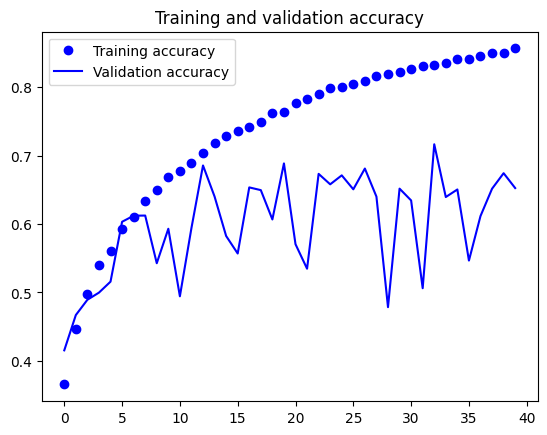

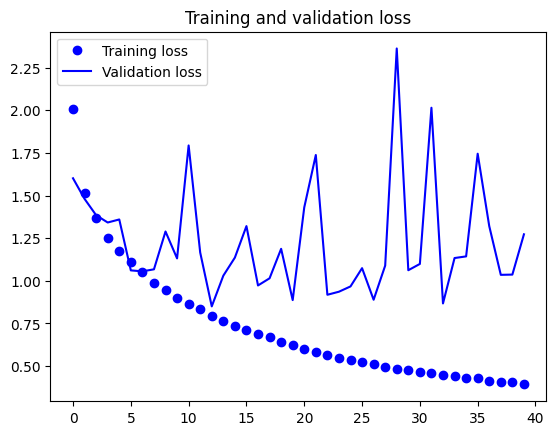

In [3]:
test_eval = model.evaluate(testX, testY_one_hot, verbose=1)
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

accuracy = model_train_dropout.history['accuracy']
val_accuracy = model_train_dropout.history['val_accuracy']
loss = model_train_dropout.history['loss']
val_loss = model_train_dropout.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')

plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [5]:
predicted_classes = model.predict(testX)
#print(np.round(predicted_classes))
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
#print(predicted_classes)
#print(predicted_classes.shape, testY.shape)
correct = np.where(predicted_classes==testY)[0]
print(f'correct: {correct}')
print(testX.shape)
print(f'testX[correct]{testX[correct].shape}')
print("Found %d correct labels" % len(correct))
'''
for i, correct in enumerate(correct[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(testX[correct], cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], testY[correct]))
    plt.tight_layout()
'''
incorrect = np.where(predicted_classes!=testY)[0]
print("Found %d incorrect labels" % len(incorrect))
'''
for i, incorrect in enumerate(incorrect[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(testX[incorrect], cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], testY[incorrect]))
    plt.tight_layout()
'''
from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(num_classes)]
print(classification_report(testY, predicted_classes, target_names=target_names))


500/500 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step
correct: [    1     2     3 ... 15996 15998 15999]
(16000, 84, 84, 3)
testX[correct](6952, 84, 84, 3)
Found 6952 correct labels
Found 9048 incorrect labels
              precision    recall  f1-score   support

     Class 0       0.26      0.72      0.38      2000
     Class 1       0.46      0.22      0.30      2000
     Class 2       0.54      0.06      0.11      2000
     Class 3       0.54      0.45      0.49      2000
     Class 4       0.70      0.19      0.30      2000
     Class 5       0.44      0.81      0.57      2000
     Class 6       0.38      0.33      0.35      2000
     Class 7       0.88      0.71      0.78      2000

    accuracy                           0.43     16000
   macro avg       0.52      0.43      0.41     16000
weighted avg       0.52      0.43      0.41     16000

